# MRMR: multiresolution multi-robot visualization

Code for the visual analysis of an experiment for this paper. It is assumed that the experiments had been run with nRobot1Day-Run. 

This notebook creates the specific type of visualizations for this paper. 

In [ ]:
import sys
sys.path.append("../../..")
from exp_run_config import Config
Config.PROJECTNAME = "WaterBerryFarms"
import pathlib
from pprint import pprint
import gzip as compress
import pickle

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from information_model import StoredObservationIM

from wbf_figures import end_of_day_graphs
import wbf_figures

In [2]:
# the experiment for the robot run
experiment = "nrobot1day"

# run = "mrmr-3random"
# run = "mrmr-3lawnmowers"
run = "mrmr-lead-2bidders"

exp = Config().get_experiment(experiment, run)
pprint(exp)

resultsfile = pathlib.Path(exp["data_dir"], "results.pickle")
if not resultsfile.exists():
    print(f"Results file does not exist:\n{resultsfile}")
    print("Run the notebook Run-1Robot1Day with the same exp/run to create it.")
    raise Exception("Nothing to do.")

# load the results file
with compress.open(resultsfile, "rb") as f:
    results = pickle.load(f)

Loading pointer config file: C:\Users\lboloni\.config\WaterBerryFarms\mainsettings.yaml
Loading machine-specific config file: G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\WBF-config-LotziYoga.yaml
No system dependent experiment file
 G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\experiment-config\LotziYoga\nrobot1day\mrmr-lead-2bidders_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: nrobot1day/mrmr-lead-2bidders successfully loaded
{'data_dir': WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/WBF/ExperimentData/nrobot1day/mrmr-lead-2bidders'),
 'exp_environment': 'miniberry-100',
 'exp_estimator': 'adaptive-disk',
 'exp_run_sys_indep_file': WindowsPath('C:/Users/lboloni/Documents/Code/_Checkouts/WBF/WaterberryFarms/experiment_configs/nrobot1day/mrmr-lead-2bidders.yaml'),
 'exp_score': 'weighted_asymmetric',
 'group_name': 'nrobot1day',
 'im_resolution': 10,
 'name': '1 lead 2 bidders',
 'robots': [{'exp-policy': '

### Map with detections
Creates a graph which shows the tylcv ground truth, the robot path and the detections. 

FIXME: we will need to deal with the multiple detections and priority etc.

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'E', 'L', 'T', 'V', 'Y', 'eight', 'four', 'n', 'nonmarkingreturn', 'one', 'period', 'six', 'space', 'two', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 23, 25, 27, 38, 40, 47, 55, 57, 60, 81, 89]
INFO:fontTools.subset:Closed glyph list over 'MATH': 19 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'E', 'L', 'T', 'V', 'Y', 'eight', 'four', 'n', 'nonmarkingreturn', 'one', 'period', 'six', 'space', 'two', 'v', 'zero']
INFO:fontTools.su

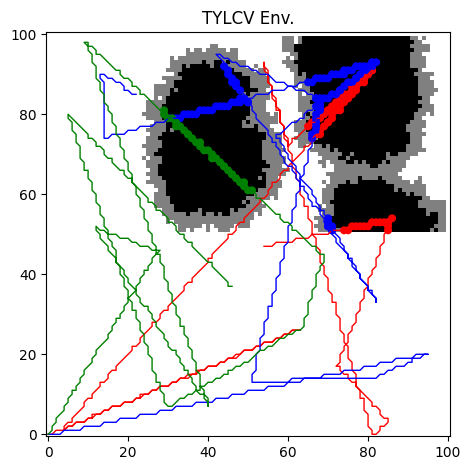

In [3]:
fig, ax = plt.subplots(1,1)
wbf_figures.show_env_tylcv(results, ax)
wbf_figures.show_robot_path(results, ax, draw_robot=False)
wbf_figures.show_detections(results, ax, field="TYLCV", radius=1.0)
plt.savefig(pathlib.Path(exp["data_dir"], "detections-map.pdf"))

### Graph with detections

Count the detections on an agent by agent basis, and create a plot for each of the agents and a sum. 

In [4]:
def count_detections(results, robotno, field = "TYLCV"):
    """Returns the number of detections for the specified robot, adapted from wbf_figures.show_detections"""
    obs = np.array(results["observations"])[:, robotno]
    detections = [[a[StoredObservationIM.X], a[StoredObservationIM.Y]] for a in obs if a[field][StoredObservationIM.VALUE] == 0.0]
    return len(detections)

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 18 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'T', 'a', 'b', 'five', 'hyphen', 'l', 'nonmarkingreturn', 'o', 'one', 'r', 'seven', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 22, 24, 26, 55, 68, 69, 79, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'MATH': 18 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'T', 'a', 'b', 'five', 'hyphen', 'l', 'nonmarkingreturn', 'o', 'one', 'r', 'seven', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph

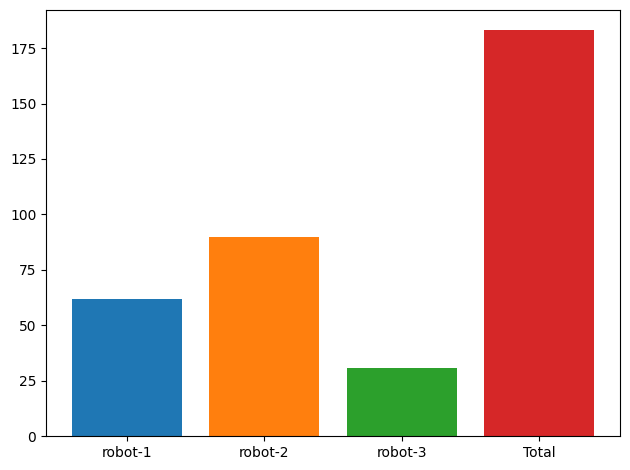

In [5]:
fig, ax = plt.subplots(1,1)
total = 0
for i, robot in enumerate(results["robots"]):
    detections = count_detections(results, i)
    total += detections
    br = ax.bar(robot.name, detections)
ax.bar("Total", total)
plt.savefig(pathlib.Path(exp["data_dir"], "detections-bar.pdf"))